In [1]:
import re
import nltk
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [3]:
pd.set_option("display.max_colwidth", 200) 

In [4]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [5]:
test_copy = test.copy()
train_copy = train.copy()

In [6]:
train = train.drop('Id', axis=1)
test = test.drop('Id', axis=1)

In [7]:
train.head()

,label,text
0,0,@Estrada21Karla Happy Happy Birthday Mommy Karla ng lahat.. hehehe.. Thank you for always there to us. I Love You po. Hope you notice it.
1,0,"Thank you Sabrina, great talk on timeless connections and architecture, and Freya Sykes who taught us about the Sami people #SSCA2015"
2,0,"Really not looking forward to tomorrow. I'm not into this whole "" dress up day "" thing at all."
3,1,Miley and Liam's relationship in the last song is perfect. 😍😥 #sarcasm
4,1,"What doesn't kill you makes you stronger. "" What if I cut off your left leg, would that make you stronger. Would it. #sarcasm"


In [8]:
train["label"].value_counts()

0    12401
1    10630
Name: label, dtype: int64

In [9]:
train["label"].value_counts()/len(train["label"])

0    0.538448
1    0.461552
Name: label, dtype: float64

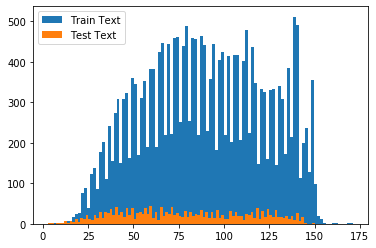

In [10]:
str_len_test = test[test['text'].str.len() < 200]['text'].str.len()
str_len_train = train[train['text'].str.len() < 200]['text'].str.len()

plt.hist(str_len_train, bins=100, label="Train Text")
plt.hist(str_len_test, bins=100, label="Test Text")
plt.legend()
plt.show()

In [11]:
combi = train.append(test, ignore_index=True)
combi.shape, train.shape, test.shape

C:\Users\hungu\anaconda.x\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


((25006, 2), (23031, 2), (1975, 1))

In [12]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [13]:
combi['text'] = np.vectorize(remove_pattern)(combi['text'], '@[\w]*')
combi.head(10)

,label,text
0,0.0,Happy Happy Birthday Mommy Karla ng lahat.. hehehe.. Thank you for always there to us. I Love You po. Hope you notice it.
1,0.0,"Thank you Sabrina, great talk on timeless connections and architecture, and Freya Sykes who taught us about the Sami people #SSCA2015"
2,0.0,"Really not looking forward to tomorrow. I'm not into this whole "" dress up day "" thing at all."
3,1.0,Miley and Liam's relationship in the last song is perfect. 😍😥 #sarcasm
4,1.0,"What doesn't kill you makes you stronger. "" What if I cut off your left leg, would that make you stronger. Would it. #sarcasm"
5,0.0,im gonna take a long ass nap when i get home
6,0.0,come to Australia for the #DangerousWomanTour 😭 you promised to come back for the honeymoon tour and you didn't! we love you
7,0.0,Ok Ezekiel Elliott and Carnell Jones what happens when a NFL team calls the wrong play? Do you quit and join the Canadian Football League?
8,1.0,Hope I don't have classes on Fridays again second semester #sarcasm
9,1.0,Birds that land and then walk across the street... What the fuck is wrong with you? #sarcasm


In [14]:
combi['text'] = combi['text'].str.replace("[^a-zA-Z]", " ") 
combi.head(10)

,label,text
0,0.0,Happy Happy Birthday Mommy Karla ng lahat hehehe Thank you for always there to us I Love You po Hope you notice it
1,0.0,Thank you Sabrina great talk on timeless connections and architecture and Freya Sykes who taught us about the Sami people SSCA
2,0.0,Really not looking forward to tomorrow I m not into this whole dress up day thing at all
3,1.0,Miley and Liam s relationship in the last song is perfect sarcasm
4,1.0,What doesn t kill you makes you stronger What if I cut off your left leg would that make you stronger Would it sarcasm
5,0.0,im gonna take a long ass nap when i get home
6,0.0,come to Australia for the DangerousWomanTour you promised to come back for the honeymoon tour and you didn t we love you
7,0.0,Ok Ezekiel Elliott and Carnell Jones what happens when a NFL team calls the wrong play Do you quit and join the Canadian Football League
8,1.0,Hope I don t have classes on Fridays again second semester sarcasm
9,1.0,Birds that land and then walk across the street What the fuck is wrong with you sarcasm


In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hungu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

combi['text'] = combi['text'].apply(lambda x: remove_stopwords(x))
combi.head()

,label,text
0,0.0,Happy Happy Birthday Mommy Karla ng lahat hehehe Thank always us I Love You po Hope notice
1,0.0,Thank Sabrina great talk timeless connections architecture Freya Sykes taught us Sami people SSCA
2,0.0,Really looking forward tomorrow I whole dress day thing
3,1.0,Miley Liam relationship last song perfect sarcasm
4,1.0,What kill makes stronger What I cut left leg would make stronger Would sarcasm


In [17]:
combi['text'] = combi['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head(10)

,label,text
0,0.0,Happy Happy Birthday Mommy Karla lahat hehehe Thank always Love Hope notice
1,0.0,Thank Sabrina great talk timeless connections architecture Freya Sykes taught Sami people SSCA
2,0.0,Really looking forward tomorrow whole dress thing
3,1.0,Miley Liam relationship last song perfect sarcasm
4,1.0,What kill makes stronger What left would make stronger Would sarcasm
5,0.0,gonna take long home
6,0.0,come Australia DangerousWomanTour promised come back honeymoon tour love
7,0.0,Ezekiel Elliott Carnell Jones happens team calls wrong play quit join Canadian Football League
8,1.0,Hope classes Fridays second semester sarcasm
9,1.0,Birds land walk across street What fuck wrong sarcasm


In [18]:
from wordcloud import WordCloud

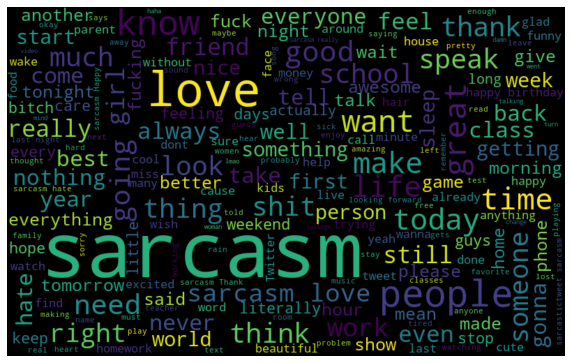

In [19]:
all_words = ' '.join([text for text in combi['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

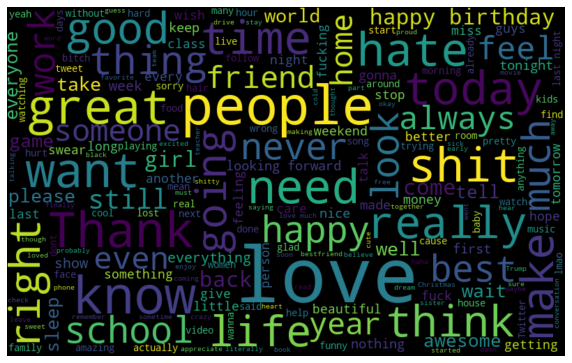

In [20]:
not_sarcastic =' '.join([text for text in combi['text'][combi['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(not_sarcastic)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Common Words in Sarcastic Text

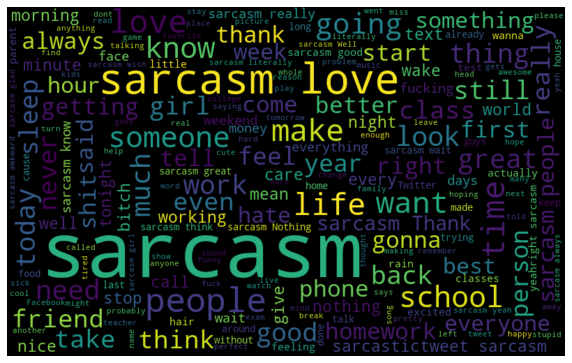

In [21]:
sarcastic =' '.join([text for text in combi['text'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(sarcastic)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Model Building

In [22]:
train = combi[combi['label'].isnull()!=True]
test = combi[combi['label'].isnull()==True]
test.shape, train.shape

((1975, 2), (23031, 2))

In [23]:
X = train.drop('label', axis=1)
y = train['label']

test = test.drop('label', axis=1)
X.shape, y.shape

((23031, 1), (23031,))

In [24]:
xtrain, xval, ytrain, yval = train_test_split(X, y, test_size=0.2, random_state=10)

In [25]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.46, min_df=1, max_features=10000)
x_train = tfidf_vectorizer.fit_transform(xtrain['text'])
x_val = tfidf_vectorizer.transform(xval['text'])

In [26]:
classifier = LogisticRegression()
classifier.fit(x_train, ytrain)

C:\Users\hungu\anaconda.x\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
pred = classifier.predict(x_val)
f1_score(yval, pred, average='micro'), accuracy_score(yval, pred)

(0.7358367701324072, 0.7358367701324072)

In [28]:
confusion_matrix(yval, pred)

array([[1906,  536],
       [ 681, 1484]], dtype=int64)

In [29]:
test_x = tfidf_vectorizer.transform(test['text'])
pred_test = classifier.predict(test_x)

In [30]:
submission = pd.DataFrame()
submission['text'] = test_copy['text']
submission['sarcastic'] = pred_test

submission['sarcastic'].replace(1, 'Yes', inplace=True)
submission['sarcastic'].replace(0, 'No', inplace=True)

In [31]:
submission['sarcastic'].value_counts(normalize=True)

Yes    0.522532
No     0.477468
Name: sarcastic, dtype: float64

In [32]:
submission.tail(20)

,text,sarcastic
1955,Gotta love having 9 - 6 days #Not,Yes
1956,Idk wat breed i . Chasing before i speak to em . So how ima know which breed ?,No
1957,Attention seeking sluts < < < unfollow,No
1958,Good thing my professor emailed the class about our cancelled 9 am ... #not,Yes
1959,I just love the drive back to Brookings #Not,No
1960,Jus foolin tho 2 chainz,No
1961,10/10 thanks for replying #not,Yes
1962,I laughed out loud at Total Eclipse of the Heart and Portrait Studio . #RealMoms #parenting #yeahright,Yes
1963,I love how Taco Bell in nky closes way before they are supposed to #TerribleService,Yes
1964,Everybody is always picking on #multinational firms . Even asking them to pay #taxes .,No
